Dataset: Iowa Home Prices

Models: Decision Tree Regressor, Random Forest Regressor

# Decision Tree Regressor

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

## Loading train data

In [2]:
train_data = pd.read_csv('train.csv')

# To check that data is working
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Identify all columns to select features and target variable
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
y = train_data.SalePrice
# y.head()

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = train_data[features]
# X.head()

## Train and test model: no maximum leaf nodes

In [5]:
# Segment data into test and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

#Identify that all the data looks correct:

# train_X.head()
# val_X.head()
# train_y.head()
# val_y.head()

In [6]:
# Fit model
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)
val_pred = model.predict(val_X)

# Test model
mae = mean_absolute_error(val_pred, val_y)
print(mae)

32966.449315068494


## Train and test model to select optimal leaf node size

In [7]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    val_pred = model.predict(val_X)
    mae = mean_absolute_error(val_pred, val_y)
    return mae

Best leaf size: 82


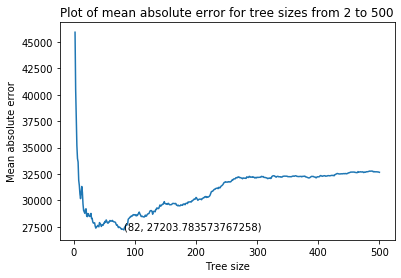

In [8]:
%matplotlib inline

# Try to find the mean absolute error (mae) for tree node sizes of 1 to 500
candidate_max_tree_depth = range(2, 501)

# Create a dictionary with:
# key = leaf size
# value = mae for that leaf size
scores = {leaf_size : get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_tree_depth}
best_leaf_size = min(scores, key=scores.get)
print('Best leaf size:', best_leaf_size)

# Visualise results:
x_values, y_values = [leaf_size for leaf_size in scores], [scores[leaf_size] for leaf_size in scores]
plt.plot(x_values, y_values)
plt.annotate(f'({best_leaf_size}, {scores[best_leaf_size]})', (best_leaf_size, scores[best_leaf_size]))
plt.xlabel('Tree size')
plt.ylabel('Mean absolute error')
plt.title('Plot of mean absolute error for tree sizes from 2 to 500')
plt.show()

## Training model on all data, with tree node size optimised

In [9]:
model_DTR = DecisionTreeRegressor(max_leaf_nodes = best_leaf_size, random_state=0)
model_DTR.fit(X, y)
val_pred2 = model_DTR.predict(X)
print('Mean absolute error:', mean_absolute_error(val_pred2, y))

Mean absolute error: 17776.10185875951


# Random Forest Regressor
Returns the average output for a number of Decision Tree Regressors, all given the same input.

## Imports

In [10]:
from sklearn.ensemble import RandomForestRegressor

## Train model on all data

In [11]:
model_RFR = RandomForestRegressor(random_state=0)
model_RFR.fit(X, y)
val_preds = model_RFR.predict(X)
mae = mean_absolute_error(val_preds, y)
print('Mean absolute error:', mae)

Mean absolute error: 9445.384355838227


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Loading test data

In [12]:
test_data = pd.read_csv('test.csv')

# test_data.describe()

## Testing model against test data

In [13]:
test_X = test_data[features]
output_DTR = model_DTR.predict(test_X)
output_RTR = model_RFR.predict(test_X) 

output = pd.DataFrame({
    'Id' : test_data.Id,
    'SalePrice' : output_DTR
})

output.to_csv('Iowa Home Prices.csv', index=False)